In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Librerias para la animación 
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter  

In [ ]:
# constantes del problema
w = 2.6617*(1e-6)   # [1/s] Frecuencia angular de la luna
G = 6.67*(1e-11)    #[Nm^2/kg^2] Constante de gravitacion
mT = 5.9736*(1e24)  #[kg] Masa de la tierra
rT = 6.3781*(1e6)   #[m] Radio de la tierra
mL = 0.07349*(1e24) #[kg] Masa de la luna
rL = 1.7374*(1e6)   #[m] Radio de la luna
d = 3.844*(1e8)     #[m] Distancia Tierra Luna


# variables normalizadas a la d_lunar
Delta = G*mT/d**3
mu = mL/mT


# intento simulación

n_dias = 10

#para 100 puntos cada hora 
nt = n_dias*24*100

# tiempo inicial

t0 = 0 

#3 dias * 24 h/dia * 3600 s/hora
tf = n_dias*24*3600 

#tiempo vector
t = np.linspace(t0, tf, nt) 
dt = t[1]-t[0] # Paso de tiempo [s]

In [ ]:
   
    # la luna empieza en la posicion w0=0
    # orbita circular para la luna por lo que
    #no debo integrar  para la atracción grav
 

def r_luna(t, w, w0=0, d=3.844*(1e8)):

  
    # w --- frecuencia angular [1/s]

    xt = d*np.cos((w+w0)*t)
    yt = d*np.sin((w+w0)*t)
    return xt,yt


#todas Variables normalizadas a la d_lunar
#Ecuación 5 
def derivada_r(P_r, P_phi, r, phi):
   

    return P_r



def derivada_phi(P_r, P_phi, r, phi):
 
    return P_phi/r**2



def derivada_P_r(P_r, P_phi, r, phi, Delta, mu, w, t): 

    
    # terminos de la ecuación:
    r_prima = (1 + r**2 - 2*r*np.cos(phi-w*t))**0.5
    t1 = P_phi**2/r**3
    t2 = 1/r**2
    t3 = (mu/r_prima**3)*(r - np.cos(phi - w*t))    
    
    # valor de la derivada
    return t1 - Delta*(t2 + t3)



def derivada_P_phi(P_r, P_phi, r, phi, Delta, mu, w, t):
  
    
    # terminos de la ecuacion:
    r_prima = (1 + r**2 - 2*r*np.cos(phi-w*t))**0.5
    return -Delta*mu*r*np.sin(phi-w*t) / (r_prima**3)

In [ ]:

#DATOS LUNA
w0 = 0 # Angulo inicial de la luna



# DATOS NAVE


# Posicion 

#Nave sale del radio  de la tierra

r0 = rT 

#Defino angulo inicial de salida
phi0 = np.deg2rad(90)           

# Orientacion **CAMBIA COMO SE MUEVE**                                                  
theta0 = np.deg2rad(70) # Mejor resultado lo he obtenido con 70 
                                                                                            
# Velocidad  (OJO velocidad de escape)

ve = (2*G*mT/rT)**0.5                    

v0 = 0.9925*ve # INTENTO: QUE SALGA CASI CON LA VE 
                                                                                             

# Normalizar variables (f)

r0 = r0/d
v0 = v0/d #ecuacion (6) 

# Segpun Ec 6.  momentos iniciales; 

P_r0   = v0*np.cos(theta0-phi0)
P_phi0 = r0*v0*np.sin(theta0-phi0)


# vectores para almacenar las trayectorias
r     = np.zeros(np.shape(t))
phi   = np.zeros(np.shape(t))
P_r   = np.zeros(np.shape(t))
P_phi = np.zeros(np.shape(t))

# datos de t0
r[0]     = r0
phi[0]   = phi0
P_r[0]   = P_r0
P_phi[0] = P_phi0



# Calcular trayectoria con RK4


for i in range(nt-1):
    # Obtener valores actuales
    t_0     = t[i]
    r_0     = r[i]
    phi_0   = phi[i]
    P_r_0   = P_r[i]
    P_phi_0 = P_phi[i]
    
    # k1s
    k1_r     = derivada_r    (P_r_0, P_phi_0, r_0, phi_0)
    k1_phi   = derivada_phi  (P_r_0, P_phi_0, r_0, phi_0)
    k1_P_r   = derivada_P_r  (P_r_0, P_phi_0, r_0, phi_0, Delta, mu, w, t_0)
    k1_P_phi = derivada_P_phi(P_r_0, P_phi_0, r_0, phi_0, Delta, mu, w, t_0)

    #  k2s
    k2_r     = derivada_r    (P_r_0 + 0.5*dt*k1_P_r,  P_phi_0 + 0.5*dt*k1_P_phi,  r_0 + 0.5*dt*k1_r,  phi_0+0.5*dt*k1_phi)
    k2_phi   = derivada_phi  (P_r_0 + 0.5*dt*k1_P_r,  P_phi_0 + 0.5*dt*k1_P_phi,  r_0 + 0.5*dt*k1_r,  phi_0+0.5*dt*k1_phi)
    k2_P_r   = derivada_P_r  (P_r_0 + 0.5*dt*k1_P_r,  P_phi_0 + 0.5*dt*k1_P_phi,  r_0 + 0.5*dt*k1_r,  phi_0+0.5*dt*k1_phi, Delta, mu, w, t_0+0.5*dt)
    k2_P_phi = derivada_P_phi(P_r_0 + 0.5*dt*k1_P_r,  P_phi_0 + 0.5*dt*k1_P_phi,  r_0 + 0.5*dt*k1_r,  phi_0+0.5*dt*k1_phi, Delta, mu, w, t_0+0.5*dt)
    
    # k3s
    k3_r     = derivada_r    (P_r_0 + 0.5*dt*k2_P_r,  P_phi_0 + 0.5*dt*k2_P_phi,  r_0 + 0.5*dt*k2_r,  phi_0+0.5*dt*k2_phi)
    k3_phi   = derivada_phi  (P_r_0 + 0.5*dt*k2_P_r,  P_phi_0 + 0.5*dt*k2_P_phi,  r_0 + 0.5*dt*k2_r,  phi_0+0.5*dt*k2_phi)
    k3_P_r   = derivada_P_r  (P_r_0 + 0.5*dt*k2_P_r,  P_phi_0 + 0.5*dt*k2_P_phi,  r_0 + 0.5*dt*k2_r,  phi_0+0.5*dt*k2_phi, Delta, mu, w, t_0+0.5*dt)
    k3_P_phi = derivada_P_phi(P_r_0 + 0.5*dt*k2_P_r,  P_phi_0 + 0.5*dt*k2_P_phi,  r_0 + 0.5*dt*k2_r,  phi_0+0.5*dt*k2_phi, Delta, mu, w, t_0+0.5*dt)
    
    # k4s
    k4_r     = derivada_r    (P_r_0 + 1.0*dt*k3_P_r,  P_phi_0 + 1.0*dt*k3_P_phi,  r_0 + 1.0*dt*k3_r,  phi_0+1.0*dt*k3_phi)
    k4_phi   = derivada_phi  (P_r_0 + 1.0*dt*k3_P_r,  P_phi_0 + 1.0*dt*k3_P_phi,  r_0 + 1.0*dt*k3_r,  phi_0+1.0*dt*k3_phi)
    k4_P_r   = derivada_P_r  (P_r_0 + 1.0*dt*k3_P_r,  P_phi_0 + 1.0*dt*k3_P_phi,  r_0 + 1.0*dt*k3_r,  phi_0+1.0*dt*k3_phi, Delta, mu, w, t_0+1.0*dt)
    k4_P_phi = derivada_P_phi(P_r_0 + 1.0*dt*k3_P_r,  P_phi_0 + 1.0*dt*k3_P_phi,  r_0 + 1.0*dt*k3_r,  phi_0+1.0*dt*k3_phi, Delta, mu, w, t_0+1.0*dt)
    
   
     # Avanzar en el tiempo - NO FUNCIONA 
    #r_1     = r_0     + dt*k1_r
    #phi_1   = phi_0   + dt*k1_phi
    #P_r_1   = P_r_0   + dt*k1_P_r
    #P_phi_1 = P_phi_0 + dt*k1_P_phi
   
    # Avanzar en el tiempo * Ks

    r_1     = r_0     + dt*(1/6)*( k1_r     + 2*k2_r     + 2*k3_r     + k4_r    )
    phi_1   = phi_0   + dt*(1/6)*( k1_phi   + 2*k2_phi   + 2*k3_phi   + k4_phi  )
    P_r_1   = P_r_0   + dt*(1/6)*( k1_P_r   + 2*k2_P_r   + 2*k3_P_r   + k4_P_r  )
    P_phi_1 = P_phi_0 + dt*(1/6)*( k1_P_phi + 2*k2_P_phi + 2*k3_P_phi + k4_P_phi)
    
    
   
    # valores nuevos
    r[i+1]     = r_1
    phi[i+1]   = phi_1
    P_r[i+1]   = P_r_1
    P_phi[i+1] = P_phi_1
    
    #print(r_0, phi_0, P_r_0, P_phi_0)
    



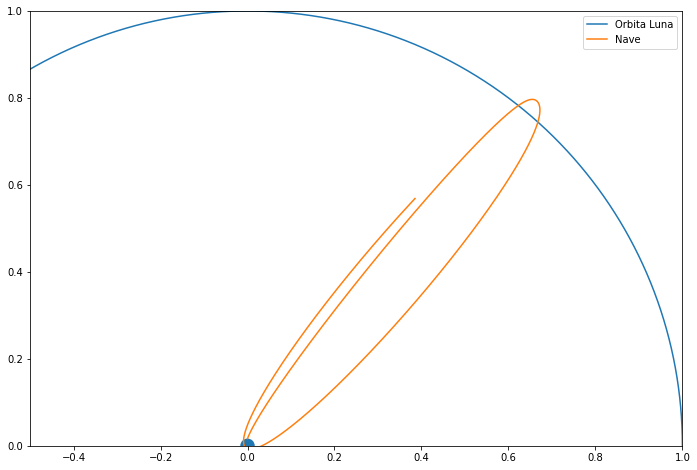

In [ ]:
# Trayectoria de la luna

x_luna,y_luna = r_luna(t, w, w0=w0, d=d)
x_luna_norm = x_luna/d
y_luna_norm = y_luna/d


# posiciones normalizadas
x = r*np.cos(phi)
y = r*np.sin(phi)

#[print(np.min(v), np.max(v)) for v in [x, y]]



# Grafica
fig, ax = plt.subplots(figsize=(12,8))

tierra = plt.Circle((0,0), rT/d)
ax.add_artist(tierra)

ax.plot(x_luna_norm, y_luna_norm, label='Orbita Luna')

n_puntos = -1
ax.plot(x[:n_puntos], y[:n_puntos], label='Nave')

plt.legend()
ax.set_xlim([-0.5,1])
ax.set_ylim([0,1])
ax.set_aspect(1)

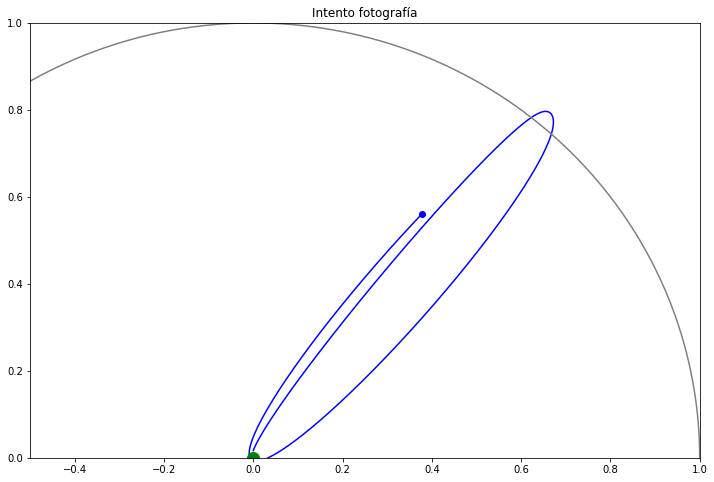

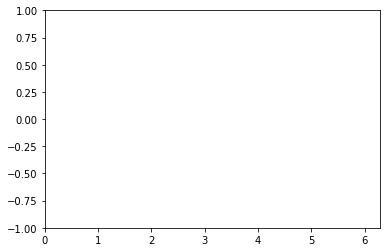

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))  
nave, = plt.plot([], [], 'o', color='blue')  
luna, = plt.plot([], [], 'o', color='gray')

nave_linea, = plt.plot([], [], color='blue')  
luna_linea, = plt.plot([], [], color='gray')

tierra, = plt.plot(0,0, 'o', color='green', ms=12)


#NOTA: 

#Yo NO sabía como animarlo y no entendía bien lo que encontré en la web
#por lo que pedí ayuda  a un compañero que sabía del tema

#intentó explicarme y traté de hacerlo con las siguientes líneas de código: 

def init():  
    ax.set_xlim(-0.5, 1.0)  
    ax.set_ylim(0, 1)
    ax.set_title('Intento fotografía')
    
def update(i):
    # posiciones
    nave_x = x[i]
    nave_y = y[i]
    luna_x = x_luna_norm[i]
    luna_y = y_luna_norm[i]
    
    # Actualizar valores
    nave.set_data(nave_x, nave_y)  
    luna.set_data(luna_x, luna_y)  
    
    nave_linea.set_data(x[:i], y[:i])
    luna_linea.set_data(x_luna_norm[:i], y_luna_norm[:i])


   

#INTENTO x ANIMARLO

ani = FuncAnimation(fig, update, np.arange(0,nt-1,100), init_func=init)  
fig.show()

writer = PillowWriter(fps=50)  
ani.save("nave-luna.gif", writer=writer, dpi=100)  

fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  
    
def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos) 

ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()

writer = PillowWriter(fps=25)  
ani.save("demo.gif", writer=writer) 

#No funcionó












Al final realicé las simulaciones con su ayuda para poder visualizar mejor lo que pasaba e ir variando Valores de theta, phi y velocidad inicial



Esto fue lo mas cercano que quedé con theta 70, phi 90 y v cercano a ve:

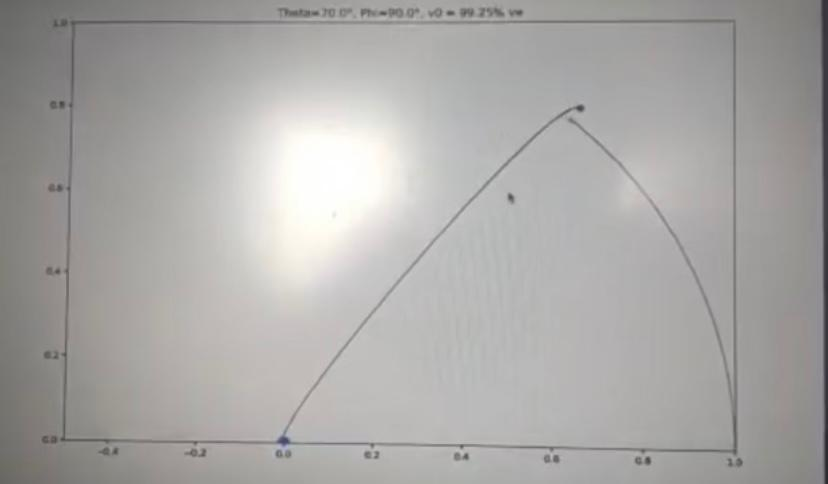

Como comento arriba, no adjunto esta parte del proceso pues no fue realizado solamente por mi.  